In [3]:
import numpy as np
import pandas as pd

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

# 배열 출 추가 : np.newaxis, np.tile()

In [9]:
a = np.array([1,2,3,4])
a.shape  # 4,
a41 = a[:,np.newaxis]
a41  # 4,1
a41 = a[np.newaxis,:]
a41  # 1,4

array([[1, 2, 3, 4]])

In [16]:
b = np.arange(15).reshape(3,5)
b
b351 = b[ : , : , np.newaxis ]
b351.shape  # 3 5 1
b351 = b[ : , np.newaxis , : ]
b351.shape  # 3 1 5
b351 = b[ np.newaxis , : , : ]
b351.shape  # 1 3 5

(1, 3, 5)

In [31]:
a = np.array([0,1,2,3])
a8 = np.tile(a,(2,1))
a8

b = np.arange(8).reshape(2,4)
b28 = np.tile(b,(2,1))
b28

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

# 행렬의 내적 : a.T * a

In [41]:
a = np.arange(15).reshape(3,5)
# 전치행렬
a.T
np.transpose(a)

a = np.arange(10)
a
ai = a[:5]
ai[1:3] = 10
ai
a   # a를 참조하고 있기 때문에 a도 데이터 변경


array([ 0, 10, 10,  3,  4,  5,  6,  7,  8,  9])

In [45]:
arr = np.arange(20).reshape(5,4)
arr
abc = np.array(['a','a','b','c','c'])
abc
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [51]:
arr[abc=='a']
arr[abc=='a',:]

arr[abc=='a',:2]
arr[abc=='a',2]

arr[abc!='a']

arr[(abc=='a') | (abc=='b')]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
arr[(abc=='a')] = 99
arr

arr[arr>20] = 0
arr

arr[(arr>=8) & (arr<=15)] = 10
arr

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [16, 17, 18, 19]])

In [70]:
a = np.array([-3.5,-2.2,0,1.6,3.14,4.05])

# 0.5 기준 내림 or 올림
np.around(a)
# 반올림, 소수이하 첫째자리
np.round_(a,1)  
# 가까운 정수로 올림 또는 내림
np.rint(a)
# 0방향으로 가까운 정수로 올림 또는 내림
np.fix(a)
# 값보다 크거나 같은 가장 작은 정수값으로 올림
np.ceil(a)
np.floor(a) # 값보다 작거나 같은 가장 큰 정수값으로 내림
# 소수 이하 버림
np.trunc(a)

array([-3., -2.,  0.,  1.,  3.,  4.])

In [79]:
a = np.array([1,2,3,4])
c = np.arange(1,5).reshape(2,2)

# 벼열 요소값 곱셈
np.prod(c)
np.prod(c, axis=0)  # 열
np.prod(c, axis=1)  # 행

array([ 2, 12])

In [89]:
np.sum(a)  # 0차원, 스칼라
a
np.sum(a, keepdims=True)  # 1차원, 벡터
np.sum(c, axis=0)
np.sum(c, axis=1)

array([3, 7])

In [97]:
d = np.array([[1,2],[3,nan]])
d
np.prod(d)
np.prod(d, axis=0)  # 열
np.prod(d, axis=1)  # 행

# np.nanprod : 곱셈할 때 nan을 1로 간주해서 곱셈
np.nanprod(d, axis=0)
np.nanprod(d, axis=1)
# np.nansum : 덧셈할 때 nan을 0으로 간주해서 덧셈
np.nansum(d)
np.nansum(d, axis=0)

array([4., 2.])

In [103]:
a
b = np.arange(1,7).reshape(2,3)
b
np.cumprod(a)
np.cumprod(b, axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]], dtype=int32)

In [107]:
# 지수함수 : np.exp(), 밑이 자연상수 e인 지수함수로 변환
# 자연상수e, y=logx or y=ln(x)

x = np.array([0.00001, 1, 2 , 10])
np.exp(x)

np.log(x)
np.log10(x)
np.log2(x)

array([-16.60964047,   0.        ,   1.        ,   3.32192809])

In [109]:
import missingno as msno

In [111]:
train = pd.read_csv('train2.csv', parse_dates=['datetime'])
test = pd.read_csv('test2.csv', parse_dates=['datetime'])
# train.info()
train.head()
test.shape

(6493, 9)

In [113]:
test.describe()
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [118]:
# Feature Engineering
# 데이터 전처리, 파생변수 생성 .. 
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

train.shape
test.shape

# 시각화

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

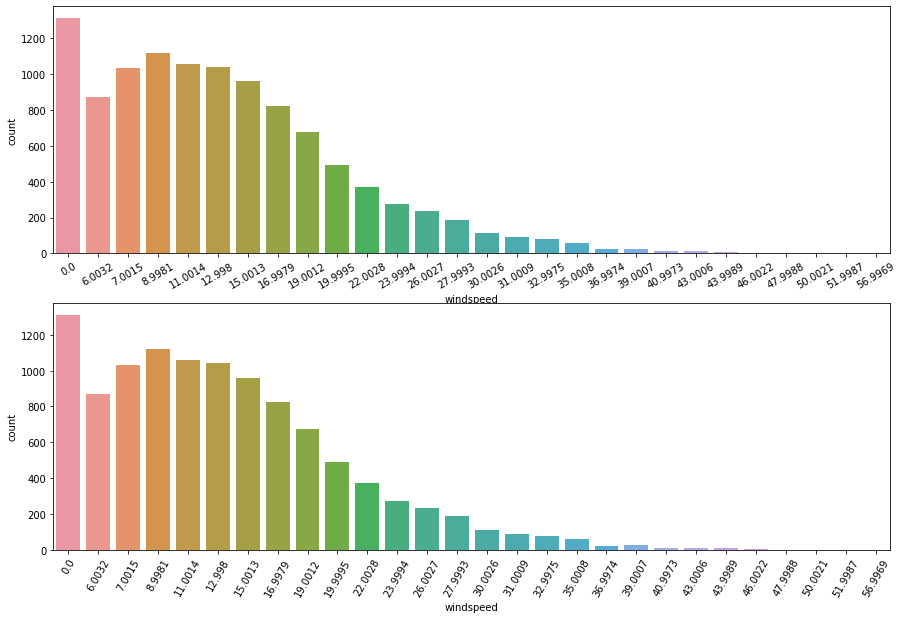

In [135]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,10)

# sca(set current axis)
plt.sca(axes[0])
plt.xticks(rotation=30)
plt.sca(axes[1])
plt.xticks(rotation=60)
sns.countplot(data = train, x='windspeed', ax=axes[0])
sns.countplot(data = train, x='windspeed', ax=axes[1])

In [139]:
trainWind0 = train.loc[train['windspeed']==0,'windspeed']
trainWindNot0 = train.loc[train['windspeed']!=0,'windspeed']
trainWind0  # 1313
trainWindNot0  # 9573

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

In [151]:
# 머신러닝의 랜덤포레스트로 풍속 예측
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    # data의 windspeed값이 0인 데이터를 rf를 이용하여 예측한 값으로 대체
    
    # 퐁속 예측에 사용되는 변수
    wCol = ['season','weather','humidity', 'temp', 'year', 'atemp']
    
    # 풍속이 0인것과 아닌것으로 구분
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    
    # 랜덤포레스트 분류기 생성
    rfModel = RandomForestClassifier()
    
    # Classifier를 사용하기 위해선 타입이 str이여야함
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # wCol -> 풍속 학습 -> 모델 완성
    rfModel.fit(dataWindNot0[wCol] ,dataWindNot0['windspeed'])
    
    # 학습된 모델로 풍속 0에 대한 데이터 예측
    preValue = rfModel.predict(dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = preValue
    
    data = predictWindNot0.append(predictWind0)
    
    # 인덱스 초기화
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)

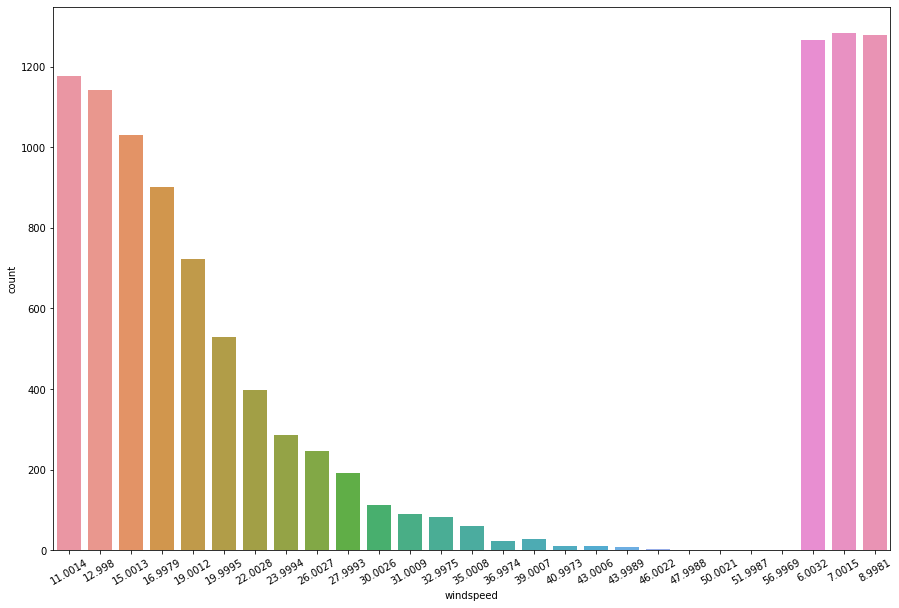

In [153]:
fig,ax1 = plt.subplots()
fig.set_size_inches(15,10)
plt.sca(ax1)
plt.xticks(rotation=30)
sns.countplot(data = train, x='windspeed', ax=ax1)

# feature(변수) selection
( ??? ) -> count?

연속형(temp, humidity, windspeed, atemp .. ), 범주형(season, weather, dayofweek ..)

범주형 변수는 타입을 category로 변경

In [169]:


train['season'].dtype  # int64
train['season'] = train['season'].astype('category')
test['season'] = test['season'].astype('category')

train.columns

# feature 이름 리스트
feature_names =['season', 'holiday', 'workingday', 'weather', 'temp',
                'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek']

# 범주형 컬럼 리스트
c_f_n = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'hour', 'dayofweek']
for v in c_f_n:
    train[v] = train[v].astype('category')
    test[v] = test[v].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null object
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null category
month         10886 non-null category
day           10886 non-null int64
hour          10886 non-null category
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null category
dtypes: category(8), datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 1022.9+ KB


In [172]:
xtrain = train[feature_names]
xtrain.shape
xtest = test[feature_names]
xtest.shape

(6493, 11)

In [174]:
ytrain = train['count']  # 레이블(정답)
ytrain.shape

(10886,)

In [199]:
# RMSLE 구하는 함수 구현
def rmsle(predicted_value, acture_value):
    
    # 넘파이 배열로의 변환
    predicted_value = np.array(predicted_value)
    acture_value = np.array(acture_value)
    
    log_predicted = np.log(predicted_value+1)
    log_acture = np.log(acture_value+1)
    
    diff = log_predicted - log_acture
    
    # 제곱  # diff ** 2
    diff = np.square(diff)
    # 평균
    mean_diff = diff.mean()
    # 제곱근
    score = np.sqrt(mean_diff)
    
    return score

In [200]:
# 
from sklearn.metrics import make_scorer

In [201]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [ ]:
# k-fold cross_validation (교차검증) p.127
'''
<  4 - fold cross_validation  >
data : 400개
1 2 3 4 : 4개의 폴드 // 각각 100개의 data
1 2 3   : train,
      4 : test
                    => 모델 평가(80)
1 2   4  : train,
    3    : test
                    => 모델 평가(70)
1   3 4  : train,
  2      : test
                    => 모델 평가(80)
  2  3  4 : train,
1         : test
                    => 모델 평가(70)
'''

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [185]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
# n_estimators= 모델을 몇개정도 만들것인가
# n_jobs= 코어의 개수 (최적 : -1)

model = RandomForestRegressor(n_estimators=80, n_jobs=-1, random_state=42)

In [239]:
%time score = cross_val_score(medel, xtrain, ytrain, cv=kfold, scoring = rmsle_scorer)
print(score.mean())

Wall time: 14.4 s
0.33092432505105757


In [240]:
model = model.fit(xtrain, ytrain)

In [241]:
prediction = model.predict(xtest)

In [242]:
prediction.shape

(6493,)

In [243]:
submmsion = pd.read_csv('sampleSubmission2.csv')
submmsion['count'] = prediction

In [244]:
submmsion.to_csv('class_sub.csv', index=False)

In [ ]:
'''연습문제'''

In [251]:
df = pd.read_csv('df_score2.csv', sep='\t')
df

,반,번호,국어,영어,수학
0,A,1,90,100,80
1,A,2,80,90,100
2,A,3,90,100,80
3,A,4,70,80,90
4,A,5,100,70,80
5,B,1,80,90,100
6,B,2,90,100,70
7,B,3,100,70,80
8,B,4,70,80,90
9,B,5,80,90,100


In [253]:
df_pivot = df.pivot_table(index=['반','번호'])
df_pivot

국어   수학   영어
반 번호               
A 1    90   80  100
  2    80  100   90
  3    90   80  100
  4    70   90   80
  5   100   80   70
B 1    80  100   90
  2    90   70  100
  3   100   80   70
  4    70   90   80
  5    80  100   90

In [256]:
df_pivot['평균'] = df_pivot.mean(axis=1)
df_pivot

국어   수학   영어         평균
반 번호                          
A 1    90   80  100  90.000000
  2    80  100   90  90.000000
  3    90   80  100  90.000000
  4    70   90   80  80.000000
  5   100   80   70  83.333333
B 1    80  100   90  90.000000
  2    90   70  100  86.666667
  3   100   80   70  83.333333
  4    70   90   80  80.000000
  5    80  100   90  90.000000

In [259]:
df3 = df.pivot_table(index='번호',columns=['반'])
df3

국어        수학        영어     
반     A    B    A    B    A    B
번호                              
1    90   80   80  100  100   90
2    80   90  100   70   90  100
3    90  100   80   80  100   70
4    70   70   90   90   80   80
5   100   80   80  100   70   90

In [263]:
df3.loc['평균']=df3.mean(axis=0)
df3

국어            수학            영어       
반       A      B      A      B      A      B
번호                                          
1    90.0   80.0   80.0  100.0  100.0   90.0
2    80.0   90.0  100.0   70.0   90.0  100.0
3    90.0  100.0   80.0   80.0  100.0   70.0
4    70.0   70.0   90.0   90.0   80.0   80.0
5   100.0   80.0   80.0  100.0   70.0   90.0
평균   86.0   84.0   86.0   88.0   88.0   86.0

6.
양의 정수 I가 주어지면, 당신이 할 일은 I보다 큰 수 중 가장 작은 수 J를 찾습니다. I의 이진수 형태에서의 1의 개수와 J의 이진수 형태에서의 1의 개수는 일치합니다.

예를들어, "78"이 주어지면, 여러분은 "1001110"과 같은 이진수 형태로 쓸 수 있습니다. 이 이진수는 4개의 1을 가지고 있습니다. "1001110" 보다 크고 4개의 1을 포함하는 가장 작은 정수는 "1010011"입니다. 출력값은 "83"이 되어야 합니다.

Input

각 줄에 한개의 정수를 입력할 수 있습니다. (1 <= I <= 100)
0이 나오면 입력을 종료합니다. 이 줄은 작업할 필요 없습니다.

Output

각 줄에 한개의 정수를 출력하면 됩니다.

Sample Input

1
2
3
4
78
0
Sample Output

2
4
5
8
83


In [4]:
def IJ():
    # 정수를 입력받음
    Sample_Input = int(input())
    
    # 입력받은 수를 2진수로 변환
    Sample_Input_binary = np.binary_repr(Sample_Input)
    
    # 2진 변환된 수의 1의 개수
    cnt_1 = Sample_Input_binary.count('1')
    
    cnt_next_1 = 0
    
    # 입력값을 1씩 증가시키며 2진수의 1의 개수를 파악후 같으면 정지
    while cnt_1 != cnt_next_1:
        Sample_Input = Sample_Input + 1
        Sample_Input_binary = np.binary_repr(Sample_Input)
        cnt_next_1 = Sample_Input_binary.count('1')
    print(Sample_Input)
    
    # 입력값이 0이면 종료
    if Sample_Input!=0:
        IJ()

In [6]:
IJ()

78
83
4
8
0
0


In [275]:
a = 5
b = np.binary_repr(a)
b.count('1')
np.d

2

In [276]:
help(np.binary_repr)

Help on function binary_repr in module numpy:

binary_repr(num, width=None)
    Return the binary representation of the input number as a string.
    
    For negative numbers, if width is not given, a minus sign is added to the
    front. If width is given, the two's complement of the number is
    returned, with respect to that width.
    
    In a two's-complement system negative numbers are represented by the two's
    complement of the absolute value. This is the most common method of
    representing signed integers on computers [1]_. A N-bit two's-complement
    system can represent every integer in the range
    :math:`-2^{N-1}` to :math:`+2^{N-1}-1`.
    
    Parameters
    ----------
    num : int
        Only an integer decimal number can be used.
    width : int, optional
        The length of the returned string if `num` is positive, or the length
        of the two's complement if `num` is negative, provided that `width` is
        at least a sufficient number of bits for